# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [45]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [8]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

621

## Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
#Declare Variables for future use
city_name_list = []
cloudiness_list = []
country_list = []
date_list = []
humidity_list = []
lat_list = []
lng_list = []
max_temp_list = []
wind_speed_list = []
iCount = 0
set_counter = 1

In [6]:
base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="


# For each city name in cities list
for index, city in enumerate(cities, start = 1):
    try:
        #Get a request from the API
        response = requests.get(query_url + city).json()
        
        #Append data to each corresponding list from the API
        city_name_list.append(response["name"])
        cloudiness_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lat_list.append(response["coord"]["lat"])
        lng_list.append(response["coord"]["lon"])
        max_temp_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        
        #Break up processing in sets of 50 for easier reading of output
        #Checks if the ICount is less than 50, if it is, keep incrementing
        if iCount > 49:
            iCounter = 0
            set_counter =+ 1
        #Once the iCount is above 50, create a new set and continue grouping records by 50 again
        else:
            iCount += 1
            
        print(f"Processing index: {index_counter} Set: {set_counter} : {city}") 
    
    #Excepetion error when no city was found when pullling data from the API
    except(KeyError, IndexError):
        print("City not found")

Processing index: 1 Set: 1 : tezu
Processing index: 2 Set: 1 : mokhsogollokh
City not found
Processing index: 3 Set: 1 : jamestown
Processing index: 4 Set: 1 : mar del plata
Processing index: 5 Set: 1 : rikitea
Processing index: 6 Set: 1 : talnakh
City not found
Processing index: 7 Set: 1 : tuatapere
Processing index: 8 Set: 1 : kropotkin
Processing index: 9 Set: 1 : sao filipe
Processing index: 10 Set: 1 : guilin
Processing index: 11 Set: 1 : souillac
Processing index: 12 Set: 1 : pacific grove
Processing index: 13 Set: 1 : los llanos de aridane
Processing index: 14 Set: 1 : ushuaia
Processing index: 15 Set: 1 : hobart
Processing index: 16 Set: 1 : cape town
City not found
Processing index: 17 Set: 1 : verkhovazhye
Processing index: 18 Set: 1 : sao jose da coroa grande
Processing index: 19 Set: 1 : ponta do sol
Processing index: 20 Set: 1 : mataura
Processing index: 21 Set: 1 : chokurdakh
Processing index: 22 Set: 1 : faanui
Processing index: 23 Set: 1 : muros
Processing index: 24 Set

Processing index: 1 Set: 5 : olafsvik
Processing index: 2 Set: 5 : ormara
Processing index: 3 Set: 5 : gizo
Processing index: 4 Set: 5 : xiaoshi
Processing index: 5 Set: 5 : la reforma
City not found
Processing index: 6 Set: 5 : oriximina
Processing index: 7 Set: 5 : cockburn town
Processing index: 8 Set: 5 : verkhoyansk
Processing index: 9 Set: 5 : mikumi
Processing index: 10 Set: 5 : lugovaya
Processing index: 11 Set: 5 : marzuq
Processing index: 12 Set: 5 : petropavlovsk-kamchatskiy
Processing index: 13 Set: 5 : sarh
Processing index: 14 Set: 5 : vostok
Processing index: 15 Set: 5 : grand gaube
Processing index: 16 Set: 5 : solnechnyy
Processing index: 17 Set: 5 : baykit
Processing index: 18 Set: 5 : luba
Processing index: 19 Set: 5 : shingu
Processing index: 20 Set: 5 : lorengau
Processing index: 21 Set: 5 : choa saidan shah
Processing index: 22 Set: 5 : agirish
Processing index: 23 Set: 5 : fukue
Processing index: 24 Set: 5 : moose factory
Processing index: 25 Set: 5 : sterling
Pr

Processing index: 2 Set: 9 : atar
Processing index: 3 Set: 9 : shiyan
Processing index: 4 Set: 9 : kupang
Processing index: 5 Set: 9 : nome
Processing index: 6 Set: 9 : halifax
Processing index: 7 Set: 9 : mardin
City not found
Processing index: 8 Set: 9 : neuquen
Processing index: 9 Set: 9 : moron
Processing index: 10 Set: 9 : vila velha
Processing index: 11 Set: 9 : simbahan
Processing index: 12 Set: 9 : ayan
Processing index: 13 Set: 9 : qasigiannguit
Processing index: 14 Set: 9 : casablanca
Processing index: 15 Set: 9 : narsaq
Processing index: 16 Set: 9 : priladozhskiy
Processing index: 17 Set: 9 : velikiy ustyug
Processing index: 18 Set: 9 : yerbogachen
Processing index: 19 Set: 9 : ugoofaaru
Processing index: 20 Set: 9 : nabire
Processing index: 21 Set: 9 : pemberton
Processing index: 22 Set: 9 : coffs harbour
Processing index: 23 Set: 9 : terrace
Processing index: 24 Set: 9 : kandiari
Processing index: 25 Set: 9 : merrill
Processing index: 26 Set: 9 : dutlwe
Processing index: 2

## Convert Raw Data to DataFrame
* Save as csv

In [12]:
#Convert data appended to lists, into a single dataframe for easier manipulation
weather_df = pd.DataFrame({ 
                "City" : city_name_list,
                "Cloudiness" : cloudiness_list,
                "Country" : country_list,
                "Date" : date_list,
                "Humidity" : humidity_list,
                "Lat" : lat_list,
                "Lng" : lng_list,
                "Max Temp" : max_temp_list,
                "Wind Speed" : wind_speed_list
})

weather_df.head()

#Come back later and re-format the "Date" Column

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Tezu,64,IN,1603181381,65,27.92,96.17,83.44,0.72
1,Mokhsogollokh,100,RU,1603181383,96,61.47,128.92,25.12,3.47
2,Jamestown,90,US,1603181109,93,42.10,-79.24,54.00,3.36
3,Mar del Plata,0,AR,1603181384,61,-38.00,-57.56,51.01,10.29
4,Rikitea,2,PF,1603181384,81,-23.12,-134.97,73.72,18.90


In [15]:
#Save the new dataframe into a csv file
weather_df.to_csv(output_data_file, index = False)

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

### Latitude vs. Temperature Plot

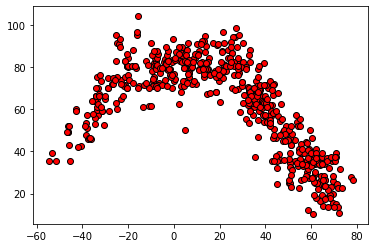

In [26]:
#Create a scatter plot, comparing Lat(x_axis) and Max Temp (y_axis)
plt.scatter(weather_df["Lat"], weather_df["Max Temp"], facecolor = "red", edgecolor = "black")

plt.savefig("Images/City_Latitude_VS_Temperature.png")

### Latitude vs. Humidity Plot

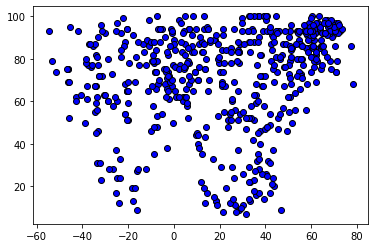

In [27]:
#Create a scatter plot, comparing Lat(x_axis) and Humidity (y_axis)
plt.scatter(weather_df["Lat"], weather_df["Humidity"], facecolor = "blue", edgecolor = "black")

plt.savefig("Images/City_Latitude_VS_Humidity.png")

### Latitude vs. Cloudiness Plot

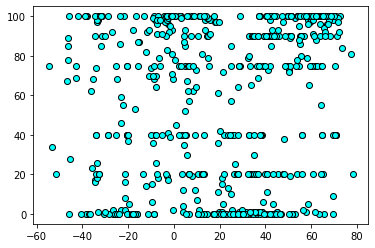

In [28]:
#Create a scatter plot, comparing Lat(x_axis) and Cloudiness (y_axis)
plt.scatter(weather_df["Lat"], weather_df["Cloudiness"], facecolor = "cyan", edgecolor = "black")

plt.savefig("Images/City_Latitude_VS_Cloudiness.png")

### Latitude vs. Wind Speed Plot

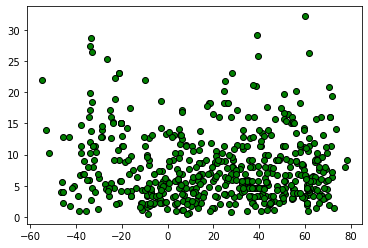

In [29]:
#Create a scatter plot, comparing Lat(x_axis) and Wind Speed (y_axis)
plt.scatter(weather_df["Lat"], weather_df["Wind Speed"], facecolor = "green", edgecolor = "black")

plt.savefig("Images/City_Latitude_VS_WindSpeed.png")

## Linear Regression

### Write linear regression plot function (optional)

In [35]:
#Split the weather_df into two dataframes 
#northern and southern hemisphere
northernHemisphere = weather_df.loc[weather_df["Lat"] >= 0]
southernHemisphere = weather_df.loc[weather_df["Lat"] < 0]

print(northernHemisphere.head())
print(southernHemisphere.head())

            City  Cloudiness Country        Date  Humidity    Lat     Lng  \
0           Tezu          64      IN  1603181381        65  27.92   96.17   
1  Mokhsogollokh         100      RU  1603181383        96  61.47  128.92   
2      Jamestown          90      US  1603181109        93  42.10  -79.24   
5        Talnakh          40      RU  1603181384        92  69.49   88.40   
7      Kropotkin          20      RU  1603181384        47  45.44   40.58   

   Max Temp  Wind Speed  
0     83.44        0.72  
1     25.12        3.47  
2     54.00        3.36  
5     15.80        4.47  
7     57.00        7.02  
             City  Cloudiness Country        Date  Humidity    Lat     Lng  \
3   Mar del Plata           0      AR  1603181384        61 -38.00  -57.56   
4         Rikitea           2      PF  1603181384        81 -23.12 -134.97   
6       Tuatapere          89      NZ  1603181384        75 -46.13  167.68   
10       Souillac          40      MU  1603181385        65 -20.52   

In [47]:
#Define LinearAgression function for use in later scatter plots
def linearAgression(x,y):
    print(f"r-squared : round({st.pearsonr(x, y)})"[0],2)
    (mslope, bintercept, rvalue, pvalue, stderr) = st.linregress(x, y)
    linEquation = "y = " + str(round(mslope,2)) + "x + " + str(round(bintercept,2))
    return linEquation

###  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

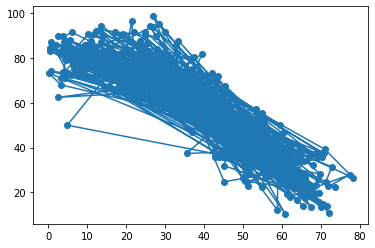

In [49]:
#Create A scatter plot, comparing the Max Temp and Latitude for the Northern Hemisphere
plt.scatter(northernHemisphere["Lat"], northernHemisphere["Max Temp"])

plt.plot(northernHemisphere["Lat"], northernHemisphere["Max Temp"])

#plt.savefig("Images/Northern_Hemisphere-Max_Temp_VS_Latitude-LinearRegression")

###  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

###  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

###  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

###  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

###  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

###  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

###  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression